# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 615


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"
units = 'metric'

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q={city}&units={units}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        
        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | avarua
Processing Record 2 of Set 1 | blackmans bay
Processing Record 3 of Set 1 | margaret river
Processing Record 4 of Set 1 | vila franca do campo
Processing Record 5 of Set 1 | castillos
Processing Record 6 of Set 1 | hithadhoo
Processing Record 7 of Set 1 | lihue
Processing Record 8 of Set 1 | happy valley-goose bay
Processing Record 9 of Set 1 | pisco
Processing Record 10 of Set 1 | klyuchi
Processing Record 11 of Set 1 | bubaque
Processing Record 12 of Set 1 | college
Processing Record 13 of Set 1 | cativa
Processing Record 14 of Set 1 | edinburgh of the seven seas
Processing Record 15 of Set 1 | utrik
Processing Record 16 of Set 1 | seogwipo
City not found. Skipping...
Processing Record 17 of Set 1 | ribeira grande
Processing Record 18 of Set 1 | taiohae
City not found. Skipping...
Processing Record 19 of Set 1 | georgetown
Processing Record 20 of Set 1 | ytyk-kyuyel'
City not found. Skip

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          581
Lat           581
Lng           581
Max Temp      581
Humidity      581
Cloudiness    581
Wind Speed    581
Country       581
Date          581
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,avarua,-21.2078,-159.7750,28.03,74,40,6.17,CK,1707680073
1,blackmans bay,-43.0167,147.3167,14.18,86,100,1.06,AU,1707679868
2,margaret river,-33.9500,115.0667,17.80,78,43,7.36,AU,1707680074
3,vila franca do campo,37.7167,-25.4333,18.27,99,51,7.31,PT,1707680074
4,castillos,-34.1667,-53.8333,32.49,47,0,7.75,UY,1707680075


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,avarua,-21.2078,-159.7750,28.03,74,40,6.17,CK,1707680073
1,blackmans bay,-43.0167,147.3167,14.18,86,100,1.06,AU,1707679868
2,margaret river,-33.9500,115.0667,17.80,78,43,7.36,AU,1707680074
3,vila franca do campo,37.7167,-25.4333,18.27,99,51,7.31,PT,1707680074
4,castillos,-34.1667,-53.8333,32.49,47,0,7.75,UY,1707680075


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

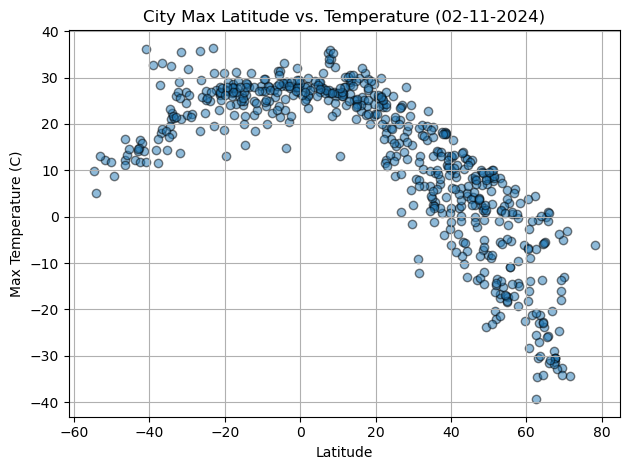

In [9]:
# Build scatter plot for latitude vs. temperature
import datetime
import matplotlib.pyplot as plt

plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], alpha=0.5, edgecolors='black')

# Format date
date = datetime.datetime.now()
date_str = date.strftime("%m-%d-%Y")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(True)
plt.title(f"City Max Latitude vs. Temperature ({date_str})")  
plt.tight_layout()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

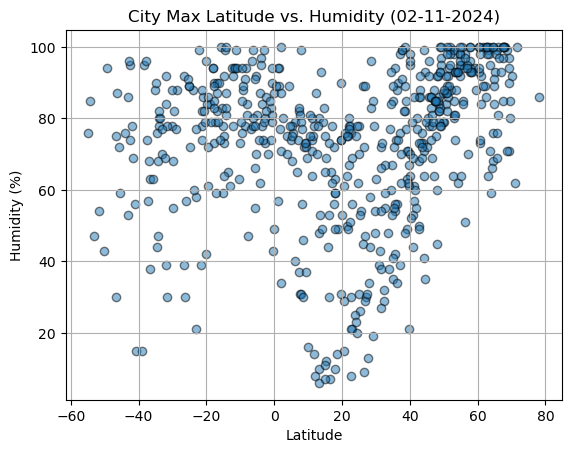

In [10]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], alpha = 0.5, edgecolors='black')

# Incorporate the other graph properties
plt.title(f"City Max Latitude vs. Humidity ({date_str})") 
plt.xlabel("Latitude")
plt.ylabel('Humidity (%)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

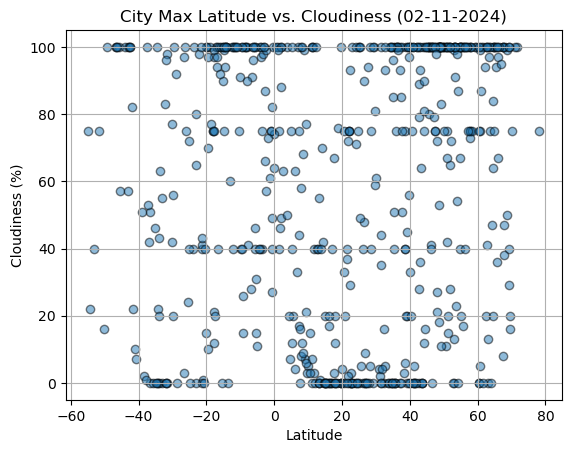

In [11]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df ['Lat'], city_data_df['Cloudiness'], alpha = 0.5, edgecolors ='black')

# Incorporate the other graph properties
plt.title(f"City Max Latitude vs. Cloudiness ({date_str})") 
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid("Ture")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

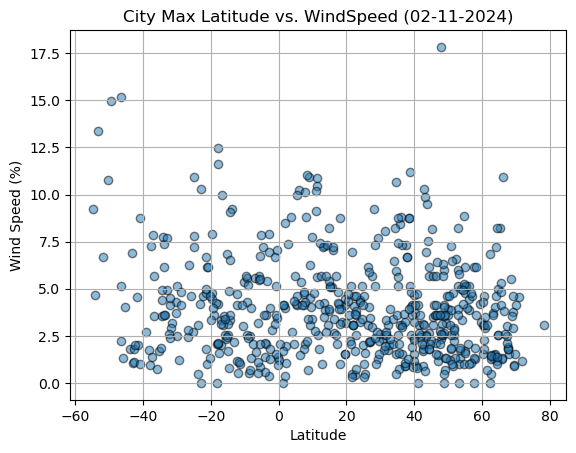

In [12]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], alpha = 0.5, edgecolors='black')

# Incorporate the other graph properties
plt.title(f"City Max Latitude vs. WindSpeed ({date_str})") 
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (%)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [14]:
# Define a function to create Linear Regression plots
def linear_regression_plot(x, y, xlabel='', ylabel='', title=''):
    slope, intercept, r_value, p_value, std_err = linregress(x, y)
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.text(0.5, 0.9, line_eq, fontsize=12, ha='center', transform=plt.gca().transAxes, color='red')

    regress_values = x * slope + intercept
    
    # Plot scatter plot
    plt.scatter(x, y)

    # Plot regression line
    plt.plot(x, slope*x + intercept, color='red')

    # Add labels and title
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    
    # print the r value
    print(f'The r-value is: {r_value**2}')
    
    # Show plot
    plt.show()

In [15]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,vila franca do campo,37.7167,-25.4333,18.27,99,51,7.31,PT,1707680074
6,lihue,21.9789,-159.3672,23.58,80,75,3.09,US,1707679794
7,happy valley-goose bay,53.3168,-60.3315,1.17,93,100,0.00,CA,1707679811
9,klyuchi,52.2667,79.1667,-13.33,88,72,6.57,RU,1707680077
10,bubaque,11.2833,-15.8333,26.56,64,0,5.64,GW,1707680077


In [16]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,avarua,-21.2078,-159.7750,28.03,74,40,6.17,CK,1707680073
1,blackmans bay,-43.0167,147.3167,14.18,86,100,1.06,AU,1707679868
2,margaret river,-33.9500,115.0667,17.80,78,43,7.36,AU,1707680074
4,castillos,-34.1667,-53.8333,32.49,47,0,7.75,UY,1707680075
5,hithadhoo,-0.6000,73.0833,26.96,79,27,3.46,MV,1707680070


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.758722828463259


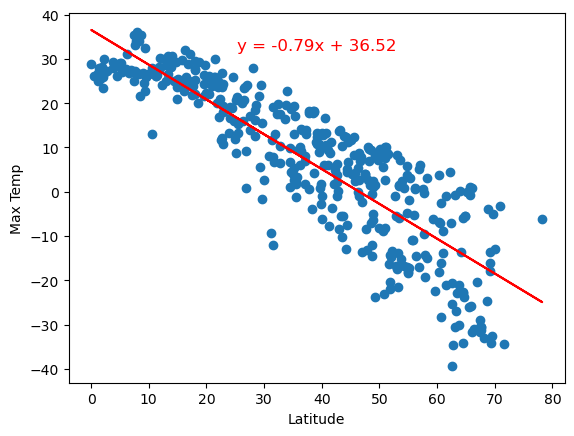

In [17]:
# Linear regression on Northern Hemisphere
linear_regression_plot(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'], 'Latitude', 'Max Temp')

The r-value is: 0.3581711554015997


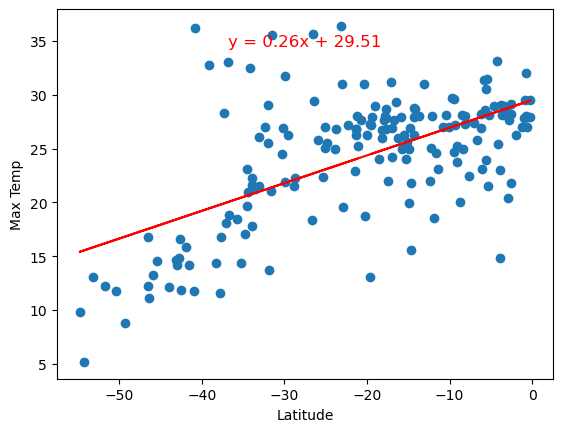

In [18]:
# Linear regression on Southern Hemisphere
linear_regression_plot(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'], 'Latitude', 'Max Temp')

**Discussion about the linear relationship:** As latitude increases, the maximum temperature also increases.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.23726277182096073


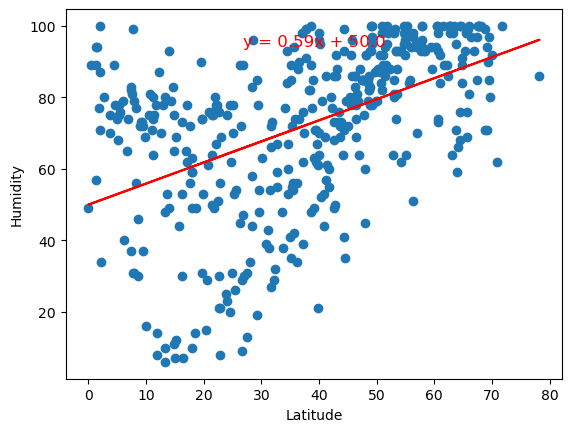

In [19]:
# Northern Hemisphere
linear_regression_plot(northern_hemi_df['Lat'], northern_hemi_df['Humidity'], 'Latitude', 'Humidity')

The r-value is: 0.09487003907566857


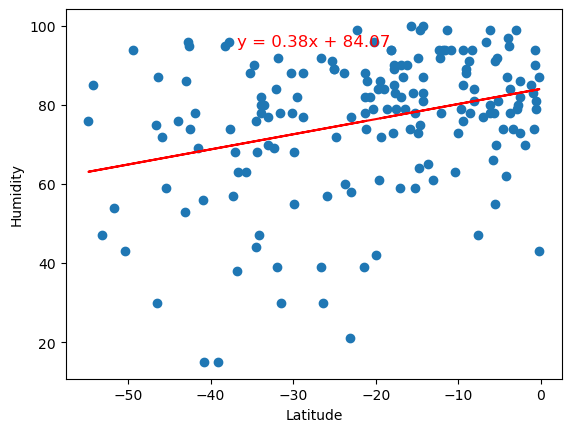

In [20]:
# Southern Hemisphere
linear_regression_plot(southern_hemi_df['Lat'], southern_hemi_df['Humidity'], 'Latitude', 'Humidity')

**Discussion about the linear relationship:** As the latitude increases, the humidity increases. 

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.11228072549709632


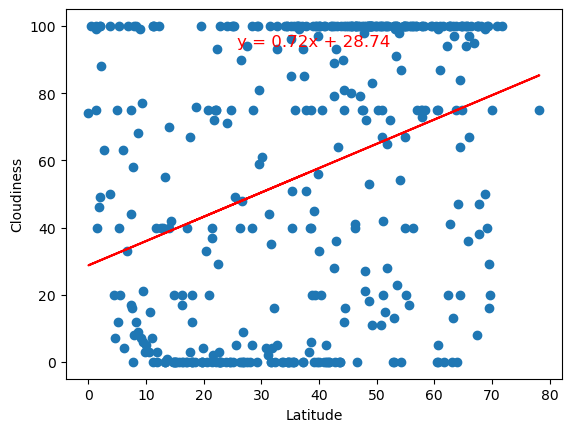

In [21]:
# Northern Hemisphere
linear_regression_plot(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'], 'Latitude', 'Cloudiness')

The r-value is: 0.04270038246488333


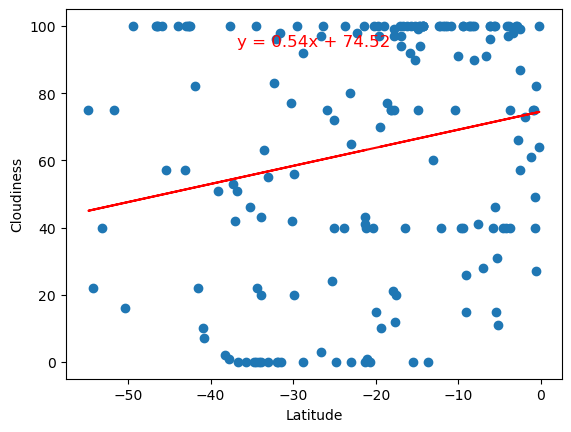

In [22]:
# Southern Hemisphere
linear_regression_plot(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'], 'Latitude', 'Cloudiness')

**Discussion about the linear relationship:** As the latitude increases, the cloudiness is also increasing. 

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.030550929062973024


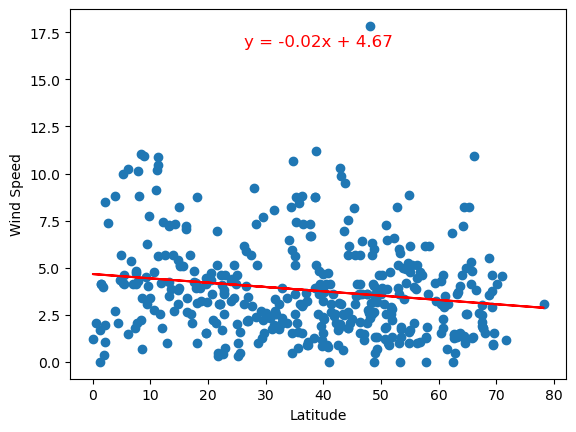

In [26]:
# Northern Hemisphere
linear_regression_plot(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'], 'Latitude', 'Wind Speed')

The r-value is: 0.050629708683056274


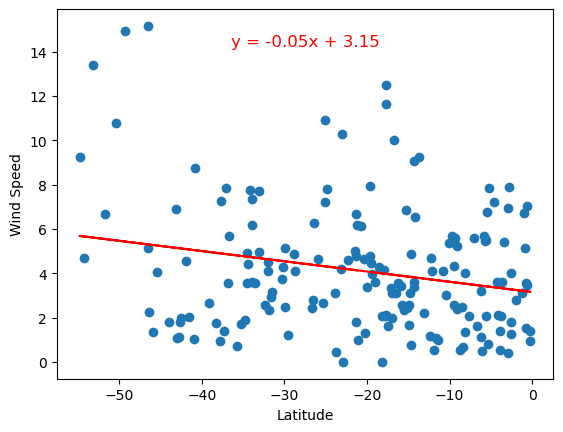

In [24]:
# Southern Hemisphere
linear_regression_plot(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'], 'Latitude', 'Wind Speed')

**Discussion about the linear relationship:** As the latitude increases, the windspeed increases. 